In [1]:
from algorithms import EpsilonGreedy, EpsilonGreedyDecay, OptimisticValue, Ucb1, ThompsonSampling
import matplotlib.pyplot as plt

In [2]:
means = [1.0, 2.0, 3.0]
n = 100000

# Epsilon Greedy

Idea is to use exploration (random move) with some probability which is Epsilon

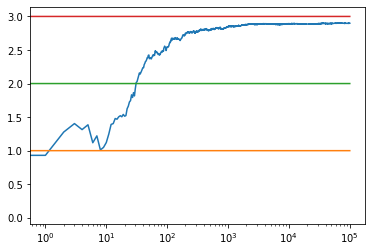

Avgs: [0.05445111 0.93033695 1.2775182  ... 2.89807362 2.89808436 2.89809154],
means: [1.0086123616679676, 2.001540706352297, 2.997262921107398]


In [3]:
eps_greedy = EpsilonGreedy(0.1)
c_avg1, means1 = eps_greedy.run_experiment(means, n)
print("Avgs: {},\nmeans: {}".format(c_avg1, means1))

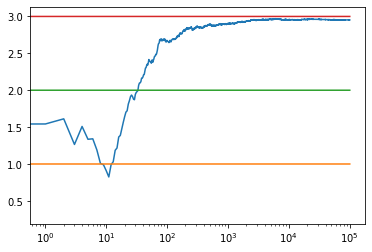

Avgs: [0.32059758 1.5425357  1.61208188 ... 2.95255266 2.95254561 2.95254545],
means: [1.0470605732509615, 1.9983149051540325, 3.003227474247619]


In [4]:
eps_greedy.epsilon = 0.05
c_avg2, means2 = eps_greedy.run_experiment(means, n)
print("Avgs: {},\nmeans: {}".format(c_avg2, means2))

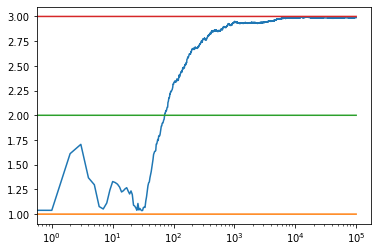

Avgs: [1.94107352 1.03832174 1.61166216 ... 2.98899385 2.98900919 2.98901781],
means: [1.1125538101170411, 2.101688490657932, 2.99911860603967]


In [5]:
eps_greedy.epsilon = 0.01
c_avg3, means3 = eps_greedy.run_experiment(means, n)
print("Avgs: {},\nmeans: {}".format(c_avg3, means3))

/home/dima/UCU/ReinforcementLearning/Repos/ReinforcementLearning/venv/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


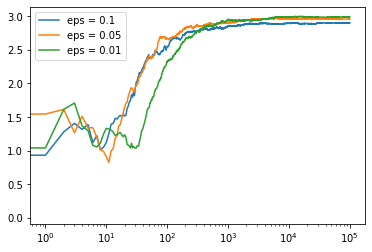

In [6]:
plt.plot(c_avg1, label='eps = 0.1')
plt.plot(c_avg2, label='eps = 0.05')
plt.plot(c_avg3, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

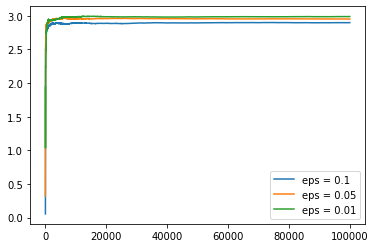

In [7]:
plt.plot(c_avg1, label='eps = 0.1')
plt.plot(c_avg2, label='eps = 0.05')
plt.plot(c_avg3, label='eps = 0.01')
plt.legend()
plt.show()

# Epsilon Greedy Decay

Idea is the same as in `Epsilon Greedy` with the difference to use dynamic epsilon instead of static:

$\epsilon = \frac{1}{i}$,

where i is iteration number

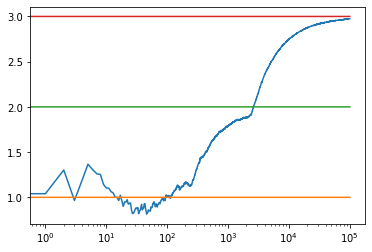

Avgs: [1.68872075 1.03999362 1.30198939 ... 2.97459703 2.97459122 2.97457919],
means: [1.1466029824279191, 2.012346905261667, 3.00086593756175]


In [8]:
eps_greedy_decay = EpsilonGreedyDecay()
c_avg_eps_decay, means_eps_decay = eps_greedy_decay.run_experiment(means, n)
print("Avgs: {},\nmeans: {}".format(c_avg_eps_decay, means_eps_decay))

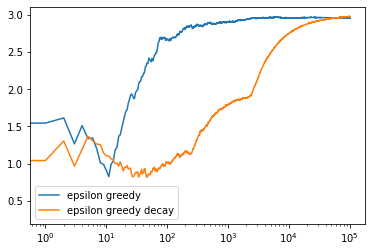

In [9]:
plt.plot(c_avg2, label='epsilon greedy')
plt.plot(c_avg_eps_decay, label='epsilon greedy decay')
plt.legend()
plt.xscale('log')
plt.show()

# Optimistic Initial Values

Idea is to guess some upper bound mean value of the slot machines and with respect to this use only greedy strategy. All bandits will start decrease their means untill one of the bandits, that corresponds to the slot machine with highest value, will stop decreasing and we will exploit only that bandit

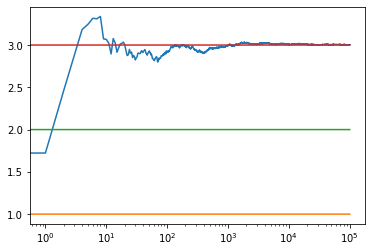

Avgs: [2.10926773 1.72239625 2.46325582 ... 3.00349805 3.00350347 3.00349537],
means: [2.109267731387189, 1.3355247593502233, 3.003520987650702]


In [10]:
opt_value = OptimisticValue(10)
c_avg_opt, means_opt = opt_value.run_experiment(means, n)
print("Avgs: {},\nmeans: {}".format(c_avg_opt, means_opt))

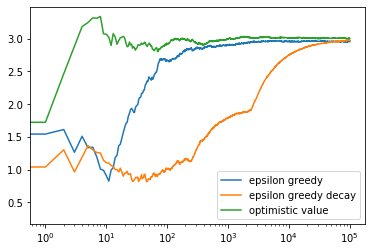

In [11]:
plt.plot(c_avg2, label='epsilon greedy')
plt.plot(c_avg_eps_decay, label='epsilon greedy decay')
plt.plot(c_avg_opt, label='optimistic value')
plt.legend()
plt.xscale('log')
plt.show()

# UCB1

Approach is similar to `Optimistic Initial Values` with the difference that we use not just means to find the best bandit to act, but confidence intervals, by choosing the upper bound of the confidence interval: 

Chernoff-Hoeffding bound:

$P\{|\overline{X} - \mu \ge \epsilon | \} \le 2 exp \{ - 2 \epsilon ^ 2 N\}$

According to this bound, we use upper part of the interval:

$X_{UCB-j} = \overline{X}_j + \sqrt{2\frac{lnN}{N_j}}$

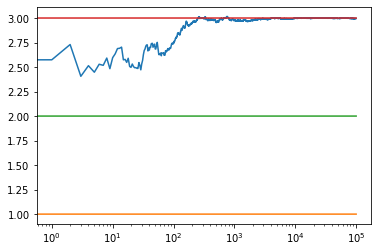

Avgs: [1.85110733 2.5738817  2.72960766 ... 2.99502629 2.99502785 2.99504187],
means: [0.8971530543069459, 1.9773747204531933, 2.9954432705695857]


In [12]:
ucb1 = Ucb1(10)
c_avg_ucb, means_ucb = ucb1.run_experiment(means, n)
print("Avgs: {},\nmeans: {}".format(c_avg_ucb, means_ucb))

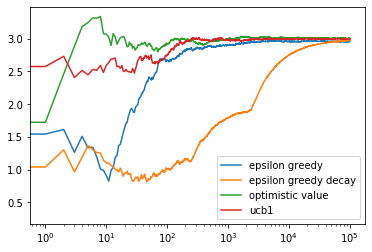

In [13]:
plt.plot(c_avg2, label='epsilon greedy')
plt.plot(c_avg_eps_decay, label='epsilon greedy decay')
plt.plot(c_avg_opt, label='optimistic value')
plt.plot(c_avg_ucb, label='ucb1')
plt.legend()
plt.xscale('log')
plt.show()

# Thompson Sampling

Thompson sampling approach is based on the Bayessian methods: estimated mean is a RV that is described by a normal distribution. To update the parameters of the distribution of the mu use bayessian rule:

$posterior \propto likelihood * prior$

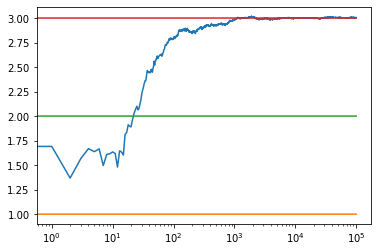

Avgs: [2.17467116 1.69034392 1.36763979 ... 3.00371714 3.00372385 3.00372959],
means: [0.8676653430882814, 1.675228692148588, 3.003932299542987]


In [14]:
thompson = ThompsonSampling()
c_avg_thompson, means_thompson = thompson.run_experiment(means, n)
print("Avgs: {},\nmeans: {}".format(c_avg_thompson, means_thompson))

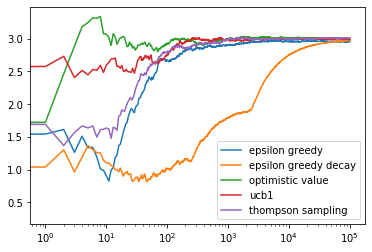

In [15]:
plt.plot(c_avg2, label='epsilon greedy')
plt.plot(c_avg_eps_decay, label='epsilon greedy decay')
plt.plot(c_avg_opt, label='optimistic value')
plt.plot(c_avg_ucb, label='ucb1')
plt.plot(c_avg_thompson, label='thompson sampling')
plt.legend()
plt.xscale('log')
plt.show()